In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install -q opendatasets
import opendatasets as od
import os

od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small',data_dir="dataset")

Skipping, found downloaded files in "dataset/fashion-product-images-small" (use force=True to force download)


In [24]:
df = pd.read_csv('dataset/fashion-product-images-small/styles.csv', on_bad_lines='warn')
df.head()

Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skipping line 35748: expected 10 fields, saw 11
Skipping line 35962: expected 10 fields, saw 11
Skipping line 37770: expected 10 fields, saw 11
Skipping line 38105: expected 10 fields, saw 11
Skipping line 38275: expected 10 fields, saw 

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [25]:
df.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

In [26]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df[['gender']].value_counts().sort_index()

gender
Boys        830
Girls       655
Men       22109
Unisex     2126
Women     18357
dtype: int64

In [29]:
df[['masterCategory']].value_counts().sort_index()

masterCategory
Accessories       11244
Apparel           21366
Footwear           9197
Free Items          105
Home                  1
Personal Care      2139
Sporting Goods       25
dtype: int64

In [30]:
df[['subCategory']].value_counts().sort_index()

subCategory             
Accessories                   129
Apparel Set                   106
Bags                         3053
Bath and Body                   9
Beauty Accessories              3
Belts                         811
Bottomwear                   2686
Cufflinks                     108
Dress                         478
Eyes                           34
Eyewear                      1073
Flip Flops                    913
Fragrance                    1001
Free Gifts                    104
Gloves                         20
Hair                           19
Headwear                      293
Home Furnishing                 1
Innerwear                    1806
Jewellery                    1079
Lips                          425
Loungewear and Nightwear      464
Makeup                        263
Mufflers                       38
Nails                         278
Perfumes                        6
Sandal                        961
Saree                         427
Scarves                

In [31]:
df[['articleType']].value_counts().sort_index()

articleType       
Accessory Gift Set      97
Baby Dolls              14
Backpacks              724
Bangle                  85
Basketballs             13
                      ... 
Waistcoat               15
Wallets                928
Watches               2542
Water Bottle            11
Wristbands               7
Length: 142, dtype: int64

In [32]:
df[['baseColour']].value_counts().sort_index()

baseColour       
Beige                 745
Black                9700
Blue                 4907
Bronze                 89
Brown                3440
Burgundy               44
Charcoal              228
Coffee Brown           29
Copper                 83
Cream                 384
Fluorescent Green       5
Gold                  621
Green                2103
Grey                 2735
Grey Melange          146
Khaki                 139
Lavender              160
Lime Green              5
Magenta               128
Maroon                577
Mauve                  28
Metallic               41
Multi                 394
Mushroom Brown         16
Mustard                97
Navy Blue            1784
Nude                   21
Off White             182
Olive                 409
Orange                523
Peach                 185
Pink                 1824
Purple               1612
Red                  2434
Rose                   21
Rust                   65
Sea Green              22
Silver              

In [33]:
df[['year']].value_counts().sort_index()

year  
2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13634
2012.0    16268
2013.0     1205
2014.0      236
2015.0     2775
2016.0     5998
2017.0     2649
2018.0      404
2019.0       33
dtype: int64

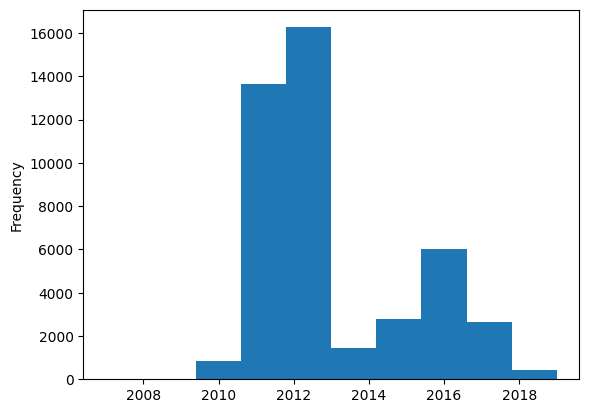

In [34]:
df['year'].plot(kind='hist')
plt.show()

In [35]:
df[['usage']].value_counts().sort_index()

usage       
Casual          34397
Ethnic           3208
Formal           2345
Home                1
Party              29
Smart Casual       67
Sports           4004
Travel             26
dtype: int64

In [36]:
images = os.listdir("dataset/fashion-product-images-small/images")

In [37]:
df['image_found'] = df['id'].apply(lambda x: f"{x}.jpg" in images)

In [38]:
df['image_found'].value_counts()

True     44072
False        5
Name: image_found, dtype: int64

In [39]:
df.loc[df['image_found'] == False, 'image_found'] = np.nan
df.dropna(inplace=True)

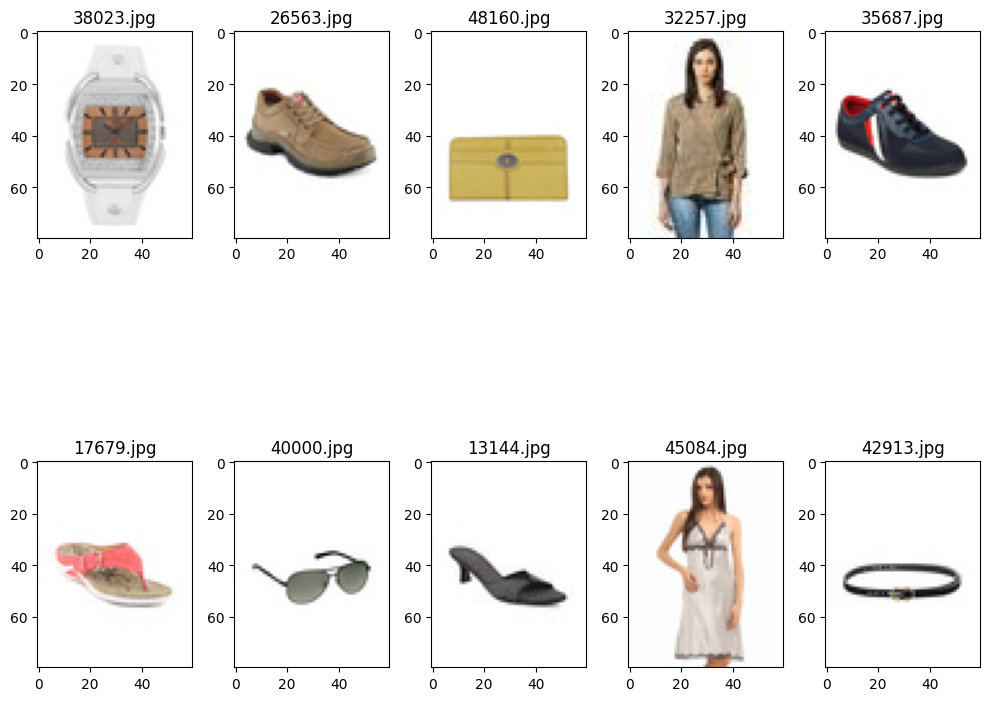

In [40]:
from PIL import Image
input_dir = 'dataset/fashion-product-images-small/images'

test_batch = os.listdir(input_dir)[424:434]
images_test = [Image.open(os.path.join(input_dir, image)) for image in test_batch]

fig, axs = plt.subplots(2, 5, figsize=(10, 10))
axs = axs.ravel()

for i, img in enumerate(images_test):
    axs[i].imshow(img)
    axs[i].set_title(test_batch[i])


plt.tight_layout()
plt.show()


In [41]:
SMALL_DATASET = True

if (SMALL_DATASET):
    df_data = pd.read_csv("dataset/fashion-product-images-small/styles.csv", on_bad_lines='skip')
    images = os.listdir("dataset/fashion-product-images-small/images")
else:
    df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')
    images = os.listdir("../input/fashion-product-images-dataset/fashion-dataset/images")

In [42]:
if (SMALL_DATASET):
    df['filename'] = df['id'].apply(lambda x: os.path.join("dataset/fashion-product-images-small/images/",str(x)+".jpg"))
else:
    df['filename'] = df['id'].apply(lambda x: os.path.join("../input/fashion-product-images-dataset/fashion-dataset/images/",str(x)+".jpg"))

In [43]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_found,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,True,dataset/fashion-product-images-small/images/15...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,True,dataset/fashion-product-images-small/images/39...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,True,dataset/fashion-product-images-small/images/59...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,True,dataset/fashion-product-images-small/images/21...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,True,dataset/fashion-product-images-small/images/53...


In [44]:
df_sample = df.sample(n=5000, random_state=0)
df_sample.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_found,filename
8072,24543,Women,Apparel,Topwear,Tops,Beige,Fall,2011.0,Ethnic,Mother Earth Women Beige Printed Top,True,dataset/fashion-product-images-small/images/24...
40447,26126,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Formal,John Miller Men Striped White Shirt,True,dataset/fashion-product-images-small/images/26...
15685,20150,Men,Apparel,Topwear,Shirts,Black,Fall,2011.0,Casual,Wrangler Men Stampede Black Shirt,True,dataset/fashion-product-images-small/images/20...
27481,12996,Boys,Footwear,Shoes,Casual Shoes,Brown,Fall,2011.0,Casual,Timberland Kids Boys Brown Casual Shoes,True,dataset/fashion-product-images-small/images/12...
23015,22594,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011.0,Sports,Nike Men Navy Blue T-shirt,True,dataset/fashion-product-images-small/images/22...


In [45]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path = df['filename'][1]
image = load_img(image_path)
image = img_to_array(image)
image.shape

(80, 60, 3)

In [46]:
if (SMALL_DATASET):
    IMAGE_WIDTH = 60
    IMAGE_HEIGHT = 60
else:
    IMAGE_WIDTH = 100
    IMAGE_HEIGHT = 100

In [47]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    image = img_to_array(image)
    return image

In [48]:
def append_images(column):
    images = []
    for file_path in column:
        images.append(process_image(file_path))
    return np.array(images)

In [49]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

output_lables = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]
(X_filepath_train, X_filepath_test,
 y_train,y_test) = train_test_split(df_sample["filename"],df_sample[output_lables],
                                                    test_size=0.2, random_state=21)

In [50]:
X_train = append_images(X_filepath_train)
X_test = append_images(X_filepath_test)

y_train.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage
39717,Women,Footwear,Shoes,Heels,Silver,Winter,Casual
15624,Men,Apparel,Topwear,Shirts,Purple,Fall,Casual
26766,Unisex,Accessories,Bags,Backpacks,Black,Summer,Casual
36607,Women,Apparel,Topwear,Kurtas,Brown,Fall,Ethnic
9825,Women,Accessories,Socks,Socks,Grey,Summer,Casual


In [51]:
y_test.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage
32227,Men,Apparel,Topwear,Kurtas,Olive,Summer,Ethnic
16426,Men,Footwear,Shoes,Casual Shoes,Brown,Fall,Casual
1458,Men,Accessories,Watches,Watches,Black,Winter,Casual
43808,Men,Footwear,Shoes,Casual Shoes,Navy Blue,Fall,Casual
12081,Women,Accessories,Bags,Handbags,Pink,Winter,Casual


In [52]:
lable_encoders = {}
data_train = {}
data_test = {}

for lable in output_lables:
    lable_encoder = LabelBinarizer()
    encoded_data_train = lable_encoder.fit_transform(y_train[lable].to_numpy())
    encoded_data_test = lable_encoder.transform(y_test[lable].to_numpy())

    lable_encoders[lable] = lable_encoder
    data_train[lable] = encoded_data_train
    data_test[lable] = encoded_data_test

# ResNet

In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten, Dropout)

from keras.applications.resnet50 import ResNet50

In [54]:
img_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
img_inputs = Input(shape=img_shape)
x = ResNet50(weights='imagenet',input_shape=img_shape, include_top=False,input_tensor=img_inputs)
x.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [55]:
x = x.output

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)

In [56]:
def make_branch(res_input, n_out, name):
    x = Dense(512, activation='relu')(res_input)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(n_out)(x)
    x = Activation("softmax",name=name)(x)
    return x

In [57]:
branches = {}

for lable in output_lables:
    branches[lable] = make_branch(x, len(lable_encoders[lable].classes_),lable)

model = Model(inputs=img_inputs,outputs=branches)

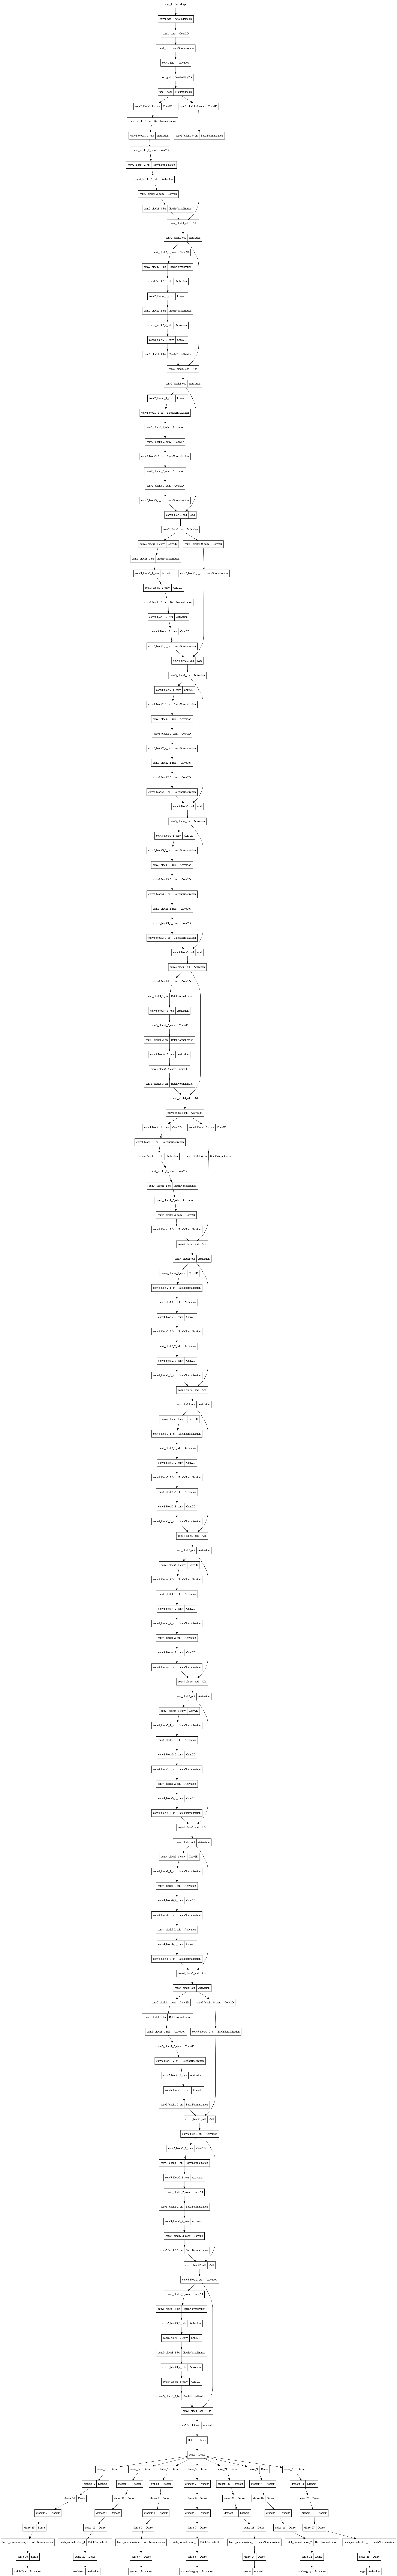

In [58]:
keras.utils.plot_model(model)

In [59]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [60]:
EPOCHS=50
history = model.fit(
    X_train,
    data_train,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/50
125/125 [==============================] - 98s 675ms/step - loss: 12.6380 - articleType_loss: 3.1102 - baseColour_loss: 3.2836 - gender_loss: 1.3365 - masterCategory_loss: 0.5403 - season_loss: 1.2885 - subCategory_loss: 1.5820 - usage_loss: 1.4968 - articleType_accuracy: 0.3130 - baseColour_accuracy: 0.2215 - gender_accuracy: 0.5070 - masterCategory_accuracy: 0.8213 - season_accuracy: 0.4250 - subCategory_accuracy: 0.6100 - usage_accuracy: 0.5240
Epoch 2/50
125/125 [==============================] - 89s 714ms/step - loss: 7.5089 - articleType_loss: 1.8108 - baseColour_loss: 2.3618 - gender_loss: 0.7336 - masterCategory_loss: 0.2138 - season_loss: 0.9858 - subCategory_loss: 0.7644 - usage_loss: 0.6388 - articleType_accuracy: 0.5422 - baseColour_accuracy: 0.3775 - gender_accuracy: 0.7458 - masterCategory_accuracy: 0.9388 - season_accuracy: 0.5518 - subCategory_accuracy: 0.8037 - usage_accuracy: 0.8020
Epoch 3/50
125/125 [==============================] - 85s 681ms/step - loss

<Axes: >

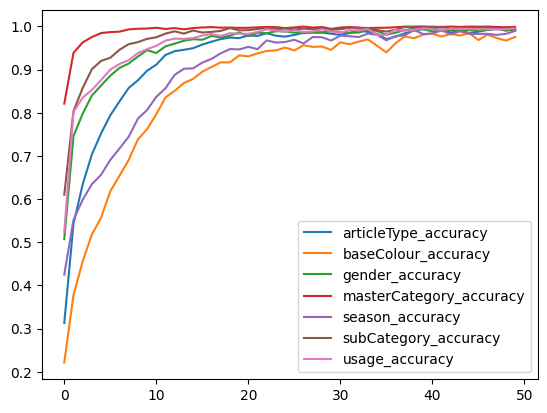

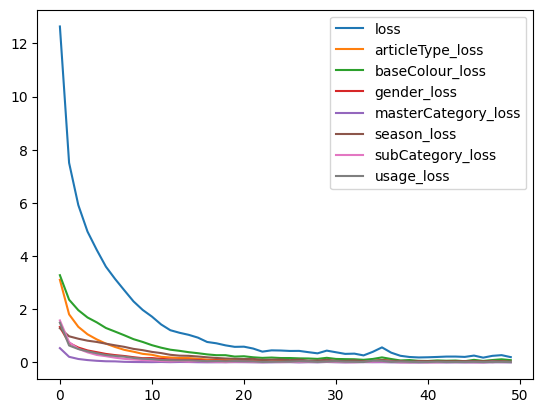

In [61]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()

In [62]:
model.save('resnet50_tl_deeper_model_2.keras')

In [63]:
import random

image_path = X_filepath_test.sample().values[0]
input_image = np.expand_dims(process_image(image_path), axis=0)

output = model.predict(input_image)

1/1 [==============================] - 6s 6s/step


In [64]:
from sklearn.metrics import accuracy_score

predictions = {}
accuracies = {}

outputs = model.predict(X_test)

for lable in output_lables:
    predictions[lable] = lable_encoders[lable].classes_[outputs[lable].argmax(axis=1)]

for lable in output_lables:
    accuracies[lable] = accuracy_score(y_test[lable],predictions[lable])

for lable in output_lables:
    print(
        "The accuracy of this model is {:.2f}% for the lable {}.".format(accuracies[lable]*100,lable)
    )

32/32 [==============================] - 14s 435ms/step
The accuracy of this model is 81.40% for the lable gender.
The accuracy of this model is 96.50% for the lable masterCategory.
The accuracy of this model is 90.20% for the lable subCategory.
The accuracy of this model is 72.20% for the lable articleType.
The accuracy of this model is 47.40% for the lable baseColour.
The accuracy of this model is 62.10% for the lable season.
The accuracy of this model is 89.20% for the lable usage.


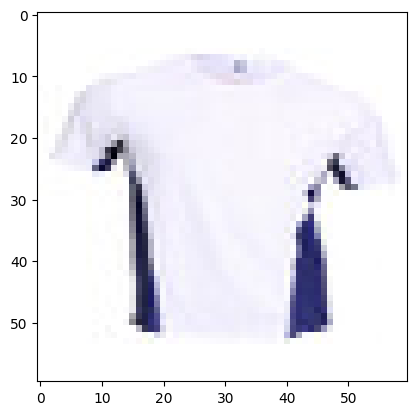

This items gender is most likely Women. With a 82.59 percent confidence.
This items masterCategory is most likely Apparel. With a 99.47 percent confidence.
This items subCategory is most likely Topwear. With a 98.71 percent confidence.
This items articleType is most likely Tshirts. With a 41.38 percent confidence.
This items baseColour is most likely White. With a 99.96 percent confidence.
This items season is most likely Summer. With a 99.35 percent confidence.
This items usage is most likely Casual. With a 94.60 percent confidence.


In [65]:
for lable in output_lables:
    output[lable] = output[lable][0]

image = load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(image, interpolation='nearest')
plt.show()
for lable in output_lables:
    print(
        "This items {} is most likely {}. With a {:.2f} percent confidence."
        .format(lable,lable_encoders[lable].classes_[output[lable].argmax()], 100 * output[lable].max())
    )

# InceptionV3 (didn't work out)



In [50]:
if (SMALL_DATASET):
    IMAGE_WIDTH = 75
    IMAGE_HEIGHT = 75
else:
    IMAGE_WIDTH = 100
    IMAGE_HEIGHT = 100

In [51]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    image = img_to_array(image)
    return image

In [52]:
def append_images(column):
    images = []
    for file_path in column:
        images.append(process_image(file_path))
    return np.array(images)

In [53]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

output_lables = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]
(X_filepath_train, X_filepath_test,
 y_train,y_test) = train_test_split(df_sample["filename"],df_sample[output_lables],
                                                    test_size=0.2, random_state=21)

In [54]:
X_train = append_images(X_filepath_train)
X_test = append_images(X_filepath_test)

y_train.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage
39717,Women,Footwear,Shoes,Heels,Silver,Winter,Casual
15624,Men,Apparel,Topwear,Shirts,Purple,Fall,Casual
26766,Unisex,Accessories,Bags,Backpacks,Black,Summer,Casual
36607,Women,Apparel,Topwear,Kurtas,Brown,Fall,Ethnic
9825,Women,Accessories,Socks,Socks,Grey,Summer,Casual


In [55]:
y_test.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage
32227,Men,Apparel,Topwear,Kurtas,Olive,Summer,Ethnic
16426,Men,Footwear,Shoes,Casual Shoes,Brown,Fall,Casual
1458,Men,Accessories,Watches,Watches,Black,Winter,Casual
43808,Men,Footwear,Shoes,Casual Shoes,Navy Blue,Fall,Casual
12081,Women,Accessories,Bags,Handbags,Pink,Winter,Casual


In [56]:
lable_encoders = {}
data_train = {}
data_test = {}

for lable in output_lables:
    lable_encoder = LabelBinarizer()
    encoded_data_train = lable_encoder.fit_transform(y_train[lable].to_numpy())
    encoded_data_test = lable_encoder.transform(y_test[lable].to_numpy())

    lable_encoders[lable] = lable_encoder
    data_train[lable] = encoded_data_train
    data_test[lable] = encoded_data_test

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten, Dropout)

from keras.applications import InceptionV3

In [70]:
img_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
img_inputs = Input(shape=img_shape)
x_inc = InceptionV3(weights='imagenet',input_shape=img_shape, include_top=False,input_tensor=img_inputs)
x_inc.trainable = False

In [71]:
x_inc = x_inc.output

x_inc = Flatten()(x_inc)

def make_branch(res_input, n_out, name):
    x_inc = Dense(256, activation='relu')(res_input)
    x_inc = Dropout(0.2)(x_inc)
    x_inc = Dense(128, activation='relu')(x_inc)
    x_inc = BatchNormalization()(x_inc)
    x_inc = Dense(n_out)(x_inc)
    x_inc = Activation("softmax",name=name)(x_inc)
    return x_inc

branches = {}

for lable in output_lables:
    branches[lable] = make_branch(x_inc, len(lable_encoders[lable].classes_),lable)

model = Model(inputs=img_inputs,outputs=branches)

In [66]:
keras.utils.plot_model(model)

In [72]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [73]:
EPOCHS=40
history = model.fit(
    X_train,
    data_train,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/40
125/125 [==============================] - 50s 301ms/step - loss: 14.8406 - articleType_loss: 3.7076 - baseColour_loss: 3.4761 - gender_loss: 1.3546 - masterCategory_loss: 1.0565 - season_loss: 1.4181 - subCategory_loss: 2.3130 - usage_loss: 1.5147 - articleType_accuracy: 0.2015 - baseColour_accuracy: 0.2015 - gender_accuracy: 0.4755 - masterCategory_accuracy: 0.6635 - season_accuracy: 0.3650 - subCategory_accuracy: 0.4572 - usage_accuracy: 0.5117
Epoch 2/40
125/125 [==============================] - 37s 295ms/step - loss: 10.7814 - articleType_loss: 2.7329 - baseColour_loss: 2.8310 - gender_loss: 0.9866 - masterCategory_loss: 0.7577 - season_loss: 1.1836 - subCategory_loss: 1.4752 - usage_loss: 0.8144 - articleType_accuracy: 0.3248 - baseColour_accuracy: 0.2882 - gender_accuracy: 0.5960 - masterCategory_accuracy: 0.7250 - season_accuracy: 0.4627 - subCategory_accuracy: 0.6223 - usage_accuracy: 0.7728
Epoch 3/40
125/125 [==============================] - 37s 296ms/step - los

<Axes: >

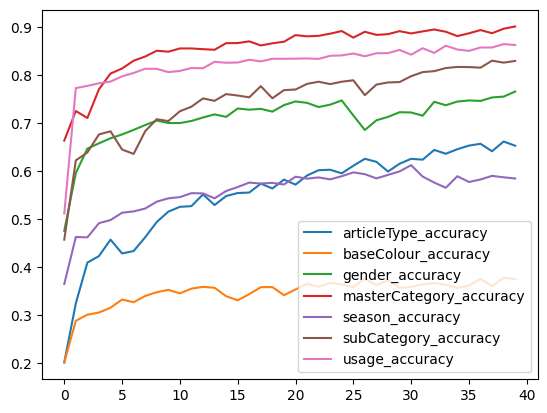

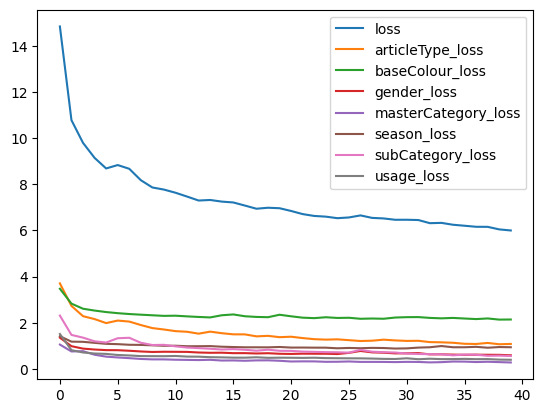

In [74]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()